<a href="https://colab.research.google.com/github/realover82/mecaai/blob/main/v23_6_IQR_XGBoost_241122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

df_iqr.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_001-v1.csv', index=False)

In [ ]:

df_iqr_remain.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr_remain-v1.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
abnormal = pd.read_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv') #, encoding = 'cp949')

In [ ]:
import pandas as pd
import numpy as np
normal = pd.read_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr_remain-v1.csv') #, encoding = 'cp949')

In [7]:
normal

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
0,75.6648,30.0155,100.000486,100.01548,0
1,75.6706,32.2732,100.000486,100.01548,0
2,75.6776,32.1592,98.853300,99.14600,0
3,75.8656,30.8312,98.791800,99.17675,0
4,73.6468,29.5274,98.791800,99.20750,0
...,...,...,...,...,...
332238,67.5951,24.5822,100.555000,99.31990,0
332239,69.7477,24.6776,100.681000,99.32550,0
332240,69.6538,24.5689,100.681000,99.32550,0
332241,69.6970,24.6643,100.681000,99.32550,0


In [ ]:
normal['설비 이상신호'] = 0

abnormal['설비 이상신호'] = 1

In [14]:
from sklearn.model_selection import train_test_split
train_Y, test_Y = train_test_split(normal, test_size =0.3, random_state =1)
print('학습 데이터셋 개수:', len(train_Y))
print('테스트 데이터셋 개수:', len(test_Y))

학습 데이터셋 개수: 232570
테스트 데이터셋 개수: 99673


In [8]:
train_Y

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
320329,71.6486,24.2349,99.9814,100.0560,0
252742,74.8703,23.3284,100.0040,99.9627,0
84054,69.4963,20.0641,100.0780,100.0680,0
160224,69.9548,19.9671,100.3030,100.2620,0
273206,74.9906,24.4483,100.1650,99.8549,0
...,...,...,...,...,...
117583,71.5045,20.3600,100.3760,100.3940,0
73349,72.5537,23.0418,99.7762,100.0280,0
312201,70.8171,21.3326,100.1110,100.1110,0
267336,72.5840,25.8935,100.2270,99.8681,0


In [52]:
from sklearn.preprocessing import MinMaxScaler
# 스케일링
scaler = MinMaxScaler()
# 정상 학습데이터 스케일링
normal_train_scaled = scaler.fit_transform(train_Y.iloc[:,:-1])
X_normal_train = pd.DataFrame(data=normal_train_scaled, index=train_Y.iloc[:,:-1].index,
                              columns=train_Y.iloc[:,:-1].columns)
# 정상 학습데이터 y 값 설정
y_normal_train = train_Y.iloc[:,-1]
# 최종 정상 학습데이터
train_Y_normal = pd.concat([X_normal_train, y_normal_train], axis=1)
# 정상 테스트데이터 스케일링
normal_test_scaled = scaler.transform(test_Y.iloc[:,:-1])
X_normal_test = pd.DataFrame(data=normal_test_scaled, index=test_Y.iloc[:,:-1].index,
                             columns=test_Y.iloc[:,:-1].columns)
# 정상 테스트데이터 y 값 설정
y_normal_test = test_Y.iloc[:,-1]
# 최종 정상 테스트데이터
test_Y_normal = pd.concat([X_normal_test, y_normal_test], axis=1)
# 비정상 테스트 데이터 스케일링
abnormal_test_scaled = scaler.transform(abnormal.iloc[:, :-1])
X_abnormal_test = pd.DataFrame(data=abnormal_test_scaled,
          index=abnormal.iloc[:, :-1].index,columns=abnormal.iloc[:, :-1].columns)
# y 값 설정
y_abnormal_test = abnormal.iloc[:,-1]
# 최종 비정상 테스트데이터
abnormal_data = pd.concat([X_abnormal_test, y_abnormal_test], axis=1)

In [108]:
#  각 변수의 shape 출력
print("normal_train_scaled shape:", normal_train_scaled.shape)  # 스케일링된 학습 데이터
print("X_normal_train shape:", X_normal_train.shape)            # 정상 학습 데이터 특성
print("y_normal_train shape:", y_normal_train.shape)            # 정상 학습 데이터 타겟
print("train_Y_normal shape:", train_Y_normal.shape)            # 최종 정상 학습 데이터 (X + y)

print("normal_test_scaled shape:", normal_test_scaled.shape)    # 스케일링된 테스트 데이터
print("X_normal_test shape:", X_normal_test.shape)              # 정상 테스트 데이터 특성
print("y_normal_test shape:", y_normal_test.shape)              # 정상 테스트 데이터 타겟
print("test_Y_normal shape:", test_Y_normal.shape)              # 최종 정상 테스트 데이터 (X + y)

print("abnormal_test_scaled shape:", abnormal_test_scaled.shape)  # 비정상 테스트 데이터 스케일링
print("X_abnormal_test shape:", X_abnormal_test.shape)            # 비정상 테스트 데이터 특성
print("y_abnormal_test shape:", y_abnormal_test.shape)            # 비정상 테스트 데이터 타겟
print("abnormal_data shape:", abnormal_data.shape)

normal_train_scaled shape: (232570, 4)
X_normal_train shape: (232570, 4)
y_normal_train shape: (232570,)
train_Y_normal shape: (232570, 5)
normal_test_scaled shape: (99673, 4)
X_normal_test shape: (99673, 3)
y_normal_test shape: (99673,)
test_Y_normal shape: (99673, 5)
abnormal_test_scaled shape: (13147, 4)
X_abnormal_test shape: (13147, 3)
y_abnormal_test shape: (13147,)
abnormal_data shape: (13147, 5)


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# 예시로 XGBoost 모델 사용
import xgboost as xgb

# XGBoost 모델 정의
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=5, learning_rate=0.1, n_estimators=100)

# 모델 훈련
xgb_model.fit(X_normal_train, y_normal_train)

# 예측 (정상 데이터, 비정상 데이터에 대해 예측 수행)
y_pred_normal = xgb_model.predict(X_normal_test)
y_pred_abnormal = xgb_model.predict(X_abnormal_test)

# 실제 라벨 (정상 데이터, 비정상 데이터 라벨 결합)
y_true_normal = y_normal_test
y_true_abnormal = y_abnormal_test

# 예측 라벨 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, y_true_abnormal])

# 성능 평가: 정확도, 정밀도, 재현율, F1 스코어, 혼동 행렬

# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)

# 정밀도 계산
precision = precision_score(y_true, y_pred)

# 재현율 계산
recall = recall_score(y_true, y_pred)

# F1 스코어 계산
f1 = f1_score(y_true, y_pred)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)

# 결과 출력
print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 Score:", f1)

# Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 출력
print("\n혼동 행렬:")
print(conf_matrix)

# # 혼동 행렬 시각화 (옵션)
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["정상", "비정상"])
# disp.plot(cmap='Blues')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


정확도: 0.8834692430420138
정밀도: 0.0
재현율: 0.0
F1 Score: 0.0

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          정상       0.88      1.00      0.94     99673
         비정상       0.00      0.00      0.00     13147

    accuracy                           0.88    112820
   macro avg       0.44      0.50      0.47    112820
weighted avg       0.78      0.88      0.83    112820


혼동 행렬:
[[99673     0]
 [13147     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


아래는 수많은 시행착오 결과물들

In [112]:
# XGBoost 예측 확률을 사용하여 임계값을 조정
y_pred_prob = xgb_model.predict_proba(X_normal_test)[:, 1]  # 비정상 클래스에 대한 확률을 선택
threshold = 0.3  # 임계값을 0.3으로 설정하여 비정상 클래스를 더 자주 예측하도록 함
y_pred = (y_pred_prob > threshold).astype(int)

# 예측 성능 평가
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\n혼동 행렬:")
print(conf_matrix)

# # 혼동 행렬 시각화
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["정상", "비정상"])
# disp.plot(cmap='Blues')
# plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [112820, 99673]

In [109]:
from sklearn.preprocessing import MinMaxScaler
# 스케일링
scaler = MinMaxScaler()
# 정상 학습데이터 스케일링
normal_train_scaled = scaler.fit_transform(train_Y.iloc[:,:-1])
X_normal_train = pd.DataFrame(data=normal_train_scaled, index=train_Y.iloc[:,:-1].index,
                              columns=train_Y.iloc[:,:-1].columns)
# 정상 학습데이터 y 값 설정
y_normal_train = train_Y.iloc[:,-1]
# 최종 정상 학습데이터
train_Y_normal = pd.concat([X_normal_train, y_normal_train], axis=1)
# 정상 테스트데이터 스케일링
normal_test_scaled = scaler.transform(test_Y.iloc[:,:-1])
X_normal_test = pd.DataFrame(data=normal_test_scaled, index=test_Y.iloc[:,:-1].index,
                             columns=test_Y.iloc[:,:-1].columns)
# 정상 테스트데이터 y 값 설정
y_normal_test = test_Y.iloc[:,-1]
# 최종 정상 테스트데이터
test_Y_normal = pd.concat([X_normal_test, y_normal_test], axis=1)
# 비정상 테스트 데이터 스케일링
abnormal_test_scaled = scaler.transform(abnormal.iloc[:, :-1])
X_abnormal_test = pd.DataFrame(data=abnormal_test_scaled,
          index=abnormal.iloc[:, :-1].index,columns=abnormal.iloc[:, :-1].columns)
# y 값 설정
y_abnormal_test = abnormal.iloc[:,-1]
# 최종 비정상 테스트데이터
abnormal_data = pd.concat([X_abnormal_test, y_abnormal_test], axis=1)

In [110]:
#  각 변수의 shape 출력
print("normal_train_scaled shape:", normal_train_scaled.shape)  # 스케일링된 학습 데이터
print("X_normal_train shape:", X_normal_train.shape)            # 정상 학습 데이터 특성
print("y_normal_train shape:", y_normal_train.shape)            # 정상 학습 데이터 타겟
print("train_Y_normal shape:", train_Y_normal.shape)            # 최종 정상 학습 데이터 (X + y)

print("normal_test_scaled shape:", normal_test_scaled.shape)    # 스케일링된 테스트 데이터
print("X_normal_test shape:", X_normal_test.shape)              # 정상 테스트 데이터 특성
print("y_normal_test shape:", y_normal_test.shape)              # 정상 테스트 데이터 타겟
print("test_Y_normal shape:", test_Y_normal.shape)              # 최종 정상 테스트 데이터 (X + y)

print("abnormal_test_scaled shape:", abnormal_test_scaled.shape)  # 비정상 테스트 데이터 스케일링
print("X_abnormal_test shape:", X_abnormal_test.shape)            # 비정상 테스트 데이터 특성
print("y_abnormal_test shape:", y_abnormal_test.shape)            # 비정상 테스트 데이터 타겟
print("abnormal_data shape:", abnormal_data.shape)

normal_train_scaled shape: (232570, 4)
X_normal_train shape: (232570, 4)
y_normal_train shape: (232570,)
train_Y_normal shape: (232570, 5)
normal_test_scaled shape: (99673, 4)
X_normal_test shape: (99673, 4)
y_normal_test shape: (99673,)
test_Y_normal shape: (99673, 5)
abnormal_test_scaled shape: (13147, 4)
X_abnormal_test shape: (13147, 4)
y_abnormal_test shape: (13147,)
abnormal_data shape: (13147, 5)


In [53]:
X_abnormal_test


,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
0,-0.177635,0.676967,0.731076,0.341111
1,-0.006921,0.497636,0.854484,0.686520
2,-0.090098,0.696041,0.747307,0.319394
3,-0.067150,0.692723,0.747307,0.319394
4,-0.057459,0.608704,0.748146,0.341111
...,...,...,...,...
13142,-0.106205,0.650242,0.731076,0.321204
13143,-0.088123,0.651871,0.716245,0.323595
13144,-0.062493,0.653341,0.733595,0.323595
13145,-0.049847,0.654674,0.716245,0.323595


In [30]:
y_train

,설비 이상신호
113099,0
21137,0
6155,0
130355,0
265769,0
...,...
83752,0
188919,0
168400,0
275241,0


In [43]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# X_normal_train, y_normal_train, X_normal_test, y_normal_test, X_abnormal_test, y_abnormal_test는 이미 제공된 데이터

# XGBoost 모델 정의
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류 문제
    eval_metric='logloss',  # 평가 지표
    max_depth=5,  # 트리의 깊이
    learning_rate=0.1,  # 학습률
    n_estimators=100  # 트리의 개수
)

# 모델 훈련
xgb_model.fit(X_normal_train, y_normal_train)

# 예측: 정상 테스트 데이터에 대해 예측
y_pred_normal_test = xgb_model.predict(X_normal_test)

# 예측: 비정상 테스트 데이터에 대해 예측
y_pred_abnormal_test = xgb_model.predict(X_abnormal_test)

# 성능 평가 (정상 테스트 데이터)
accuracy_normal = accuracy_score(y_normal_test, y_pred_normal_test)
precision_normal = precision_score(y_normal_test, y_pred_normal_test)
recall_normal = recall_score(y_normal_test, y_pred_normal_test)
f1_normal = f1_score(y_normal_test, y_pred_normal_test)

# 성능 평가 (비정상 테스트 데이터)
accuracy_abnormal = accuracy_score(y_abnormal_test, y_pred_abnormal_test)
precision_abnormal = precision_score(y_abnormal_test, y_pred_abnormal_test)
recall_abnormal = recall_score(y_abnormal_test, y_pred_abnormal_test)
f1_abnormal = f1_score(y_abnormal_test, y_pred_abnormal_test)

# 평가 결과 출력
print("정상 테스트 데이터 성능:")
print(f"Accuracy: {accuracy_normal}")
print(f"Precision: {precision_normal}")
print(f"Recall: {recall_normal}")
print(f"F1 Score: {f1_normal}")

print("\n비정상 테스트 데이터 성능:")
print(f"Accuracy: {accuracy_abnormal}")
print(f"Precision: {precision_abnormal}")
print(f"Recall: {recall_abnormal}")
print(f"F1 Score: {f1_abnormal}")


정상 테스트 데이터 성능:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

비정상 테스트 데이터 성능:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

In [44]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# XGBoost 모델 정의 (클래스 가중치 추가)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류 문제
    eval_metric='logloss',  # 평가 지표
    max_depth=5,  # 트리의 깊이
    learning_rate=0.1,  # 학습률
    n_estimators=100,  # 트리의 개수
    scale_pos_weight=10  # 클래스 불균형에 대응하기 위한 가중치 (조정 가능)
)

# 모델 훈련
xgb_model.fit(X_normal_train, y_normal_train)

# 예측: 정상 테스트 데이터에 대해 예측
y_pred_normal_test = xgb_model.predict(X_normal_test)

# 예측: 비정상 테스트 데이터에 대해 예측
y_pred_abnormal_test = xgb_model.predict(X_abnormal_test)

# 성능 평가 (정상 테스트 데이터)
accuracy_normal = accuracy_score(y_normal_test, y_pred_normal_test)
precision_normal = precision_score(y_normal_test, y_pred_normal_test, zero_division=0)
recall_normal = recall_score(y_normal_test, y_pred_normal_test, zero_division=0)
f1_normal = f1_score(y_normal_test, y_pred_normal_test, zero_division=0)

# 성능 평가 (비정상 테스트 데이터)
accuracy_abnormal = accuracy_score(y_abnormal_test, y_pred_abnormal_test)
precision_abnormal = precision_score(y_abnormal_test, y_pred_abnormal_test, zero_division=0)
recall_abnormal = recall_score(y_abnormal_test, y_pred_abnormal_test, zero_division=0)
f1_abnormal = f1_score(y_abnormal_test, y_pred_abnormal_test, zero_division=0)

# 평가 결과 출력
print("정상 테스트 데이터 성능:")
print(f"Accuracy: {accuracy_normal}")
print(f"Precision: {precision_normal}")
print(f"Recall: {recall_normal}")
print(f"F1 Score: {f1_normal}")

print("\n비정상 테스트 데이터 성능:")
print(f"Accuracy: {accuracy_abnormal}")
print(f"Precision: {precision_abnormal}")
print(f"Recall: {recall_abnormal}")
print(f"F1 Score: {f1_abnormal}")


정상 테스트 데이터 성능:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

비정상 테스트 데이터 성능:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [47]:
xgb_model.summary()

AttributeError: 'XGBClassifier' object has no attribute 'summary'

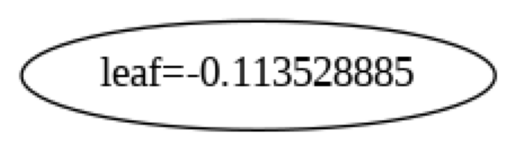

In [48]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 예시: 첫 번째 트리 시각화
xgb.plot_tree(xgb_model, num_trees=0)  # 첫 번째 트리 (num_trees는 0부터 시작)
plt.show()


In [49]:
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()


ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

In [50]:
# 트리 구조를 데이터프레임 형식으로 변환하여 보기
booster = xgb_model.get_booster()
trees = booster.get_dump(with_stats=True)  # 트리 구조 확인
print(trees[0])  # 첫 번째 트리 출력


0:leaf=-0.113528885,cover=24418.3574



In [46]:
# 혼동 행렬 (정상 테스트 데이터)
cm_normal = confusion_matrix(y_normal_test, y_pred_normal_test)

# 혼동 행렬 (비정상 테스트 데이터)
cm_abnormal = confusion_matrix(y_abnormal_test, y_pred_abnormal_test)
print("혼동 행렬 (정상 테스트 데이터):")
print(cm_normal)

print("\n혼동 행렬 (비정상 테스트 데이터):")
print(cm_abnormal)

혼동 행렬 (정상 테스트 데이터):
[[99673]]

혼동 행렬 (비정상 테스트 데이터):
[[    0     0]
 [13147     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


xgboost + autoencoder

In [54]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비 (예시)
# X_normal_train은 이미 스케일링된 데이터
# 데이터 샘플 생성 (사용자가 제공한 train_Y 데이터를 기반으로 해야함)
# X_normal_train = np.random.rand(1000, 4)  # 예시 데이터

# Autoencoder 모델 정의
input_dim = X_normal_train.shape[1]  # 입력 데이터의 특성 수
input_layer = Input(shape=(input_dim,))
encoded = Dense(3, activation='relu')(input_layer)  # 인코딩
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # 디코딩

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)  # 특성 추출을 위한 인코더

# Autoencoder 학습
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normal_train, X_normal_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_normal_train, X_normal_train))

# 특성 추출 (압축된 차원)
X_encoded = encoder.predict(X_normal_train)

# XGBoost로 학습
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=5, learning_rate=0.1, n_estimators=100)

# XGBoost에 특성을 학습 데이터로 사용
# 레이블이 없는 비지도 문제에서는 `y_train`을 만들 수 없으므로, 레이블을 랜덤하게 부여하거나, 다른 방법을 통해 레이블을 설정합니다.
y_train = np.random.randint(0, 2, size=(X_encoded.shape[0],))  # 예시로 레이블을 랜덤으로 설정

# 모델 훈련
xgb_model.fit(X_encoded, y_train)

# 예측
y_pred = xgb_model.predict(X_encoded)

# 성능 평가 (정확도 및 혼동 행렬 등)
accuracy = np.mean(y_pred == y_train)
cm = confusion_matrix(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")


Epoch 1/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0163 - val_loss: 0.0056
Epoch 2/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 3/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 4/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0011 - val_loss: 8.6126e-04
Epoch 8/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8.1578e-04 - val_loss: 7.1364e-04
Epoch 9/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.9389e-04 - val_loss: 6.5701e-04
Epoch 10/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.5596e-04 - val_loss: 6.4025e-04
Epoch 11/50
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.3846e-04 - val_loss: 6.3504e-04
Epoch 12/50
909/

In [55]:
xgb_model.summary()

AttributeError: 'XGBClassifier' object has no attribute 'summary'

In [56]:

# 최종 모델 저장
xgb_model.save('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_v1-finish-my_model.keras')


AttributeError: 'XGBClassifier' object has no attribute 'save'

In [58]:
import joblib

# XGBoost 모델을 joblib로 저장
joblib.dump(xgb_model, '/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_v1-finish-my_model.pkl')


['/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_v1-finish-my_model.pkl']

In [ ]:
# joblib로 저장한 XGBoost 모델 로딩
xgb_model_loaded = joblib.load('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_v1-finish-my_model.pkl')


In [57]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =13
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'history'

<Figure size 1000x500 with 0 Axes>

In [60]:
x_train_pred = xgb_model.predict(X_normal_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train), axis=1)




ValueError: Feature shape mismatch, expected: 3, got 4

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
# 정상 테스트 데이터에 대한 재구성 오차 계산
x_test_normal_pred = xgb_model.predict(X_normal_test)
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test), axis=1)


# 비정상 테스트 데이터에 대한 재구성 오차 계산
x_test_abnormal_pred = AE_model.predict(X_abnormal_test)
test_abnormal_mae_loss = np.mean(np.abs(x_test_abnormal_pred - X_abnormal_test), axis=1)

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_mae_loss))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_mae_loss))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 재구성 오차 합치기
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_mae_loss > threshold).astype(int),  # 정상 데이터에 대한 예측 (Threshold 초과 시 1)
    (test_abnormal_mae_loss > threshold).astype(int)  # 비정상 데이터에 대한 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))
# 혼동행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

ValueError: Feature shape mismatch, expected: 3, got 4

In [63]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error

# 훈련 데이터 (X_train, y_train)과 예측 데이터 (X_normal_train)가 준비된 상태라고 가정

# 훈련 데이터와 예측 데이터의 특성 수를 확인
print(f"훈련 데이터 특성 수: {X_train.shape[1]}")
print(f"예측 데이터 특성 수: {X_normal_train.shape[1]}")

# 예측 데이터의 특성 수가 훈련 데이터의 특성 수와 일치하도록 수정
X_normal_train_corrected = X_normal_train.iloc[:, :X_train.shape[1]]  # 특성 수 맞추기

# 예측
x_train_pred = xgb_model.predict(X_normal_train_corrected)

# MAE 계산 (평균 절대 오차)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train_corrected), axis=1)

# 결과 출력
print(f"훈련 데이터에 대한 MAE 손실: {train_mae_loss}")


훈련 데이터 특성 수: 4
예측 데이터 특성 수: 4


ValueError: Feature shape mismatch, expected: 3, got 4

In [64]:
# 예측 데이터의 특성 수가 훈련 데이터의 특성 수와 일치하도록 수정
X_normal_train_corrected = X_normal_train.iloc[:, :X_train.shape[1]]  # 훈련 데이터 특성 수만큼 자르기

# 예측
x_train_pred = xgb_model.predict(X_normal_train_corrected)

# MAE 계산 (평균 절대 오차)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train_corrected), axis=1)

# 결과 출력
print(f"훈련 데이터에 대한 MAE 손실: {train_mae_loss}")


ValueError: Feature shape mismatch, expected: 3, got 4

In [67]:
X_train

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
113099,0.453100,0.563776,0.635344,0.554762
21137,0.152840,0.421575,0.661396,0.698801
6155,0.420653,0.478058,0.629663,0.597001
130355,0.471295,0.401992,0.790122,0.650648
265769,0.779022,0.567554,0.656919,0.581812
...,...,...,...,...
83752,0.518684,0.517370,0.649084,0.603141
188919,0.614347,0.548670,0.586792,0.546780
168400,0.691453,0.521813,0.639569,0.543483
275241,0.437876,0.600845,0.644606,0.643538


In [69]:
X_train.shape[1]

4

In [72]:
# 예측 데이터와 훈련 데이터의 특성 수를 확인
print(f"훈련 데이터의 특성 수: {X_train.shape[1]}")
print(f"예측 데이터의 특성 수: {X_normal_train.shape[1]}")

# 예측 데이터의 특성 수가 훈련 데이터와 일치하도록 조정
# X_train에서 사용한 특성 수를 기반으로 예측 데이터를 잘라서 사용
# X_normal_train_corrected = X_normal_train.iloc[:, :X_train.shape[1]]

X_normal_train_corrected = X_normal_train.iloc[:, :3]

# 예측 수행
x_train_pred = xgb_model.predict(X_normal_train_corrected)

# MAE 계산 (평균 절대 오차)
# train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train_corrected), axis=1)
import numpy as np

# 예측 결과는 1D 배열로 반환되므로, 첫 번째 특성만 선택하여 MAE 계산
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train_corrected.iloc[:, 0])) #, axis=1)

# 결과 출력
# print(f"훈련 데이터에 대한 MAE 손실: {train_mae_loss}")


# 결과 출력
print(f"훈련 데이터에 대한 MAE 손실: {train_mae_loss}")


훈련 데이터의 특성 수: 4
예측 데이터의 특성 수: 4
훈련 데이터에 대한 MAE 손실: 0.4636339941278842


In [76]:
X_normal_test9 = X_normal_test.copy()

In [82]:
X_abnormal_test9 = X_abnormal_test.copy()

In [87]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt

# 임계값(Threshold)을 설정합니다.
threshold = 0.5  # 재구성 오차가 이 값을 초과하면 비정상으로 간주

# 정상 테스트 데이터에 대한 재구성 오차 계산

# X_normal_train_corrected = X_normal_train.iloc[:, :3]
X_normal_test_corrected = X_normal_test.iloc[:, :3]

X_normal_test = X_normal_test_corrected

x_test_normal_pred = xgb_model.predict(X_normal_test)
# test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test), axis=1)
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test_corrected.iloc[:, 0]))#, axis=1)



# train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_test_corrected.iloc[:, 0])) #, axis=1)

X_abnormal_test = X_abnormal_test.iloc[:, :3]

# 비정상 테스트 데이터에 대한 재구성 오차 계산
x_test_abnormal_pred = xgb_model.predict(X_abnormal_test)
# test_abnormal_mae_loss = np.mean(np.abs(x_test_abnormal_pred - X_abnormal_test)) #, axis=1)
test_abnormal_mae_loss = np.mean(np.abs(x_test_abnormal_pred - X_abnormal_test.iloc[:, 0])) #, axis=1)


# X_abnormal_test.iloc[:, 0]

# # 정상/비정상 데이터 라벨링
# y_test_normal = np.zeros(len(test_normal_mae_loss))  # 정상 데이터는 0으로 라벨링
# y_test_abnormal = np.ones(len(test_abnormal_mae_loss))  # 비정상 데이터는 1로 라벨링

# 정상 데이터는 test_normal_mae_loss의 길이에 맞춰 0으로 라벨링
y_test_normal = np.zeros(len(X_normal_test))  # X_normal_test의 길이에 맞게 라벨링

# 비정상 데이터는 test_abnormal_mae_loss의 길이에 맞춰 1로 라벨링
y_test_abnormal = np.ones(len(X_abnormal_test))  # X_abnormal_test의 길이에 맞게 라벨링


# 테스트 데이터 재구성 오차 합치기
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
# y_pred = np.concatenate([
#     (test_normal_mae_loss > threshold).astype(int),  # 정상 데이터에 대한 예측 (Threshold 초과 시 1)
#     (test_abnormal_mae_loss > threshold).astype(int)  # 비정상 데이터에 대한 예측
# ])

# 예측 라벨 (threshold 기준으로 예측)
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)  # 정상 데이터에 대한 예측
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)  # 비정상 데이터에 대한 예측


# 예측 값 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])



# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)
print("\n혼동행렬:")
print(conf_matrix)


ValueError: zero-dimensional arrays cannot be concatenated

In [91]:
# 정상 데이터 예측 값 확인
x_test_normal_pred = xgb_model.predict(X_normal_test)
print("x_test_normal_pred:", x_test_normal_pred)
print("x_test_normal_pred shape:", x_test_normal_pred.shape)

# 비정상 데이터 예측 값 확인
x_test_abnormal_pred = xgb_model.predict(X_abnormal_test)
print("x_test_abnormal_pred:", x_test_abnormal_pred)
print("x_test_abnormal_pred shape:", x_test_abnormal_pred.shape)


x_test_normal_pred: [0 0 0 ... 0 1 0]
x_test_normal_pred shape: (99673,)
x_test_abnormal_pred: [1 1 1 ... 1 1 1]
x_test_abnormal_pred shape: (13147,)


In [95]:
# 정상 데이터 예측 값 확인
x_test_normal_pred = xgb_model.predict(X_normal_test)

# 각 샘플에 대한 재구성 오차 계산
# x_test_normal_pred는 1D 배열 (예측값)이고, X_normal_test는 2D 배열 (실제값)
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test.values)) #, axis=1)  # .values로 2D 배열을 넘기기

print("test_normal_mae_loss shape:", test_normal_mae_loss.shape)


ValueError: operands could not be broadcast together with shapes (99673,) (99673,3) 

In [96]:
# x_test_normal_pred는 1D 배열 (예측값), X_normal_test는 2D 배열 (실제값)

# 각 샘플에 대해 예측값과 실제값의 차이를 계산
# x_test_normal_pred는 (99673,)의 크기를 가지므로, X_normal_test는 (99673, 3)의 크기에서 각 샘플에 대해 오차 계산
# 각 샘플의 MAE를 계산하기 위해서는 실제 값과 예측 값의 차이를 계산합니다.

# 여기서 각 샘플에 대해 예측값과 3개 특성에 대한 실제값을 비교해야 합니다.
# 일반적으로, 각 샘플에 대해 예측값을 특정 특성에 맞춰 **평균을 계산**하는 방식으로 접근합니다.
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred[:, np.newaxis] - X_normal_test.values), axis=1)

print("test_normal_mae_loss shape:", test_normal_mae_loss.shape)


test_normal_mae_loss shape: (99673,)


In [98]:
# 정상 데이터 예측 (배열로 변환)
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)
print("y_pred_normal shape:", y_pred_normal.shape)

# 비정상 데이터 예측 (배열로 변환)
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)
print("y_pred_abnormal shape:", y_pred_abnormal.shape)

# 예측 결과 결합 (정상과 비정상 예측값 결합)
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])

# 실제 라벨 생성 (정상 데이터는 0, 비정상 데이터는 1로 라벨링)
y_true = np.concatenate([y_test_normal, y_test_abnormal])

# 결과 출력
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)


y_pred_normal shape: (99673,)
y_pred_abnormal shape: ()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [99]:
# 정상 데이터 예측 (배열로 변환)
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)
print("y_pred_normal shape:", y_pred_normal.shape)

# 비정상 데이터 예측 (배열로 변환)
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)
print("y_pred_abnormal shape:", y_pred_abnormal.shape)

# 정상 데이터와 비정상 데이터 예측값 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])

# 실제 라벨 생성 (정상 데이터는 0, 비정상 데이터는 1로 라벨링)
y_true = np.concatenate([y_test_normal, y_test_abnormal])

# 결과 출력
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)


y_pred_normal shape: (99673,)
y_pred_abnormal shape: ()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [100]:
# 정상 데이터 예측 (배열로 변환)
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)
print("y_pred_normal shape:", y_pred_normal.shape)

# 비정상 데이터 예측 (배열로 변환)
# test_abnormal_mae_loss도 각 샘플에 대해 오차 계산이 되어야 하며, 그 결과는 배열이어야 합니다.
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)
print("y_pred_abnormal shape:", y_pred_abnormal.shape)

# 정상 데이터와 비정상 데이터 예측값 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])

# 실제 라벨 생성 (정상 데이터는 0, 비정상 데이터는 1로 라벨링)
y_true = np.concatenate([y_test_normal, y_test_abnormal])

# 결과 출력
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)


y_pred_normal shape: (99673,)
y_pred_abnormal shape: ()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [102]:
# 예시: 정상/비정상 데이터에 대한 재구성 오차 계산
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test.values)) #, axis=1)
test_abnormal_mae_loss = np.mean(np.abs(x_test_abnormal_pred - X_abnormal_test.values)) #, axis=1)


ValueError: operands could not be broadcast together with shapes (99673,) (99673,3) 

In [104]:
# 정상 데이터 예측 값 확인
x_test_normal_pred = xgb_model.predict(X_normal_test)

# x_test_normal_pred는 (99673,)의 크기를 가지고, X_normal_test.values는 (99673, 3)의 크기를 가지고 있음
# 각 샘플에 대해 예측값과 실제값의 차이를 계산해야 함

# 예측값을 (99673, 1) 배열로 확장하여 X_normal_test.values와 차원을 맞춤
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred[:, np.newaxis] - X_normal_test.values), axis=1)

# 결과 출력
print("test_normal_mae_loss shape:", test_normal_mae_loss.shape)


test_normal_mae_loss shape: (99673,)


In [106]:
# 정상 데이터 예측 (배열로 변환)
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)
print("y_pred_normal shape:", y_pred_normal.shape)

# 비정상 데이터 예측 (배열로 변환)
# test_abnormal_mae_loss도 각 샘플에 대한 재구성 오차여야 하므로, 비교 후 배열로 변환
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)
print("y_pred_abnormal shape:", y_pred_abnormal.shape)

# 정상 데이터와 비정상 데이터 예측값 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])

# 실제 라벨 생성 (정상 데이터는 0, 비정상 데이터는 1로 라벨링)
y_true = np.concatenate([y_test_normal, y_test_abnormal])

# 결과 출력
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)


y_pred_normal shape: (99673,)
y_pred_abnormal shape: ()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [93]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt

# 정상 테스트 데이터에 대한 재구성 오차 계산 (각 샘플에 대해 오차 계산)
x_test_normal_pred = xgb_model.predict(X_normal_test)
test_normal_mae_loss = np.abs(x_test_normal_pred - X_normal_test)  # 각 샘플에 대한 MAE 오차 계산
print("test_normal_mae_loss shape:", test_normal_mae_loss.shape)

# 비정상 테스트 데이터에 대한 재구성 오차 계산 (각 샘플에 대해 오차 계산)
x_test_abnormal_pred = xgb_model.predict(X_abnormal_test)
test_abnormal_mae_loss = np.abs(x_test_abnormal_pred - X_abnormal_test)  # 각 샘플에 대한 MAE 오차 계산
print("test_abnormal_mae_loss shape:", test_abnormal_mae_loss.shape)

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(X_normal_test))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(X_abnormal_test))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 재구성 오차 합치기
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)

# 예측 라벨 (threshold 기준으로 예측)
threshold = 0.5  # 재구성 오차가 threshold 값을 초과하면 비정상으로 간주
y_pred_normal = (test_normal_mae_loss > threshold).astype(int)  # 정상 데이터에 대한 예측
y_pred_abnormal = (test_abnormal_mae_loss > threshold).astype(int)  # 비정상 데이터에 대한 예측

# 예측 값 결합
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)
print("\n혼동행렬:")
print(conf_matrix)

# # 혼동 행렬 시각화 (옵션)
# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["정상", "비정상"])
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


ValueError: Unable to coerce to Series, length must be 3: given 99673

In [88]:
y_pred_normal

0

In [89]:
y_pred_abnormal

0

In [65]:
X_normal_train_corrected

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
320329,0.390655,0.615832,0.630446,0.590214
252742,0.649339,0.584267,0.636771,0.560062
84054,0.217838,0.470603,0.657479,0.594092
160224,0.254653,0.467225,0.720442,0.656788
273206,0.658999,0.623263,0.681825,0.525224
...,...,...,...,...
117583,0.379085,0.480906,0.740870,0.699447
73349,0.463330,0.574288,0.573024,0.581165
312201,0.323891,0.514773,0.666713,0.607989
267336,0.465763,0.673586,0.699174,0.529490


In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# XGBoost 모델 학습 파라미터 설정
params = {
    'objective': 'binary:logistic',  # 이진 분류
    'eval_metric': 'logloss',  # 평가 지표 (로스)
    'max_depth': 6,  # 트리의 최대 깊이
    'learning_rate': 0.1,  # 학습률
    'n_estimators': 100,  # 트리 개수
    'subsample': 0.8,  # 각 트리 학습에 사용할 샘플 비율
    'colsample_bytree': 0.8,  # 각 트리에서 사용할 피처의 비율
    'scale_pos_weight': 1,  # 불균형 데이터에서 비정상 데이터의 가중치 조정
    'seed': 42  # 랜덤 시드 고정
}

# 데이터 준비 (X_normal_train, y_normal_train는 이미 준비된 데이터라고 가정)
# X_train, X_test, y_train, y_test = train_test_split(X_normal_train, y_normal_train, test_size=0.2, random_state=42)

# XGBoost 모델 초기화
model = xgb.XGBClassifier(
    objective=params['objective'],
    eval_metric=params['eval_metric'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    n_estimators=params['n_estimators'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'],
    scale_pos_weight=params['scale_pos_weight'],
    seed=params['seed']
)

# 모델 학습 (X_train과 y_train을 사용)
model.fit(X_train, y_train)

# 모델 학습 후 예측
y_pred = model.predict(X_test)

# 결과 확인
print("모델 학습이 완료되었습니다. 예측 결과:", y_pred)


모델 학습이 완료되었습니다. 예측 결과: [0 0 0 ... 0 0 0]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.utils import resample

# 데이터 샘플링 (전체 데이터가 너무 크면 일부만 사용)
X_normal_train_sampled = resample(X_normal_train, n_samples=5000, random_state=42)  # 5000개 샘플로 제한
X_abnormal_test_sampled = resample(X_abnormal_test, n_samples=5000, random_state=42)  # 5000개 샘플로 제한

# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.3, min_samples=10, n_jobs=-1)  # n_jobs=-1로 병렬 처리, eps와 min_samples 조정
dbscan.fit(X_normal_train_sampled)  # 정상 데이터로 학습

# DBSCAN은 라벨로 -1 (이상치) 값을 사용합니다.
y_normal_pred = dbscan.labels_  # 학습된 정상 데이터에 대한 라벨 예측

# 비정상 테스트 데이터 예측
test_abnormal_pred = dbscan.fit_predict(X_abnormal_test_sampled.values)  # 비정상 데이터 예측

# 정상 데이터와 비정상 데이터에 대한 라벨 비교
y_true = np.concatenate([np.zeros(len(y_normal_pred)), np.ones(len(test_abnormal_pred))])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([y_normal_pred, test_abnormal_pred])  # 예측된 라벨

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 1.0
Recall (재현율): 0.1432
F1 Score: 0.25052484254723584

Classification Report:
              precision    recall  f1-score   support

          정상       0.54      1.00      0.70      5000
         비정상       1.00      0.14      0.25      5000

    accuracy                           0.57     10000
   macro avg       0.77      0.57      0.48     10000
weighted avg       0.77      0.57      0.48     10000


Confusion Matrix:
[[5000    0]
 [4284  716]]


dbscan 종료

Robust Covariance Estimation 시작


Precision (정밀도): 0.6954103770702194
Recall (재현율): 0.86552065109911
F1 Score: 0.7711962046763808

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1768 11379]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


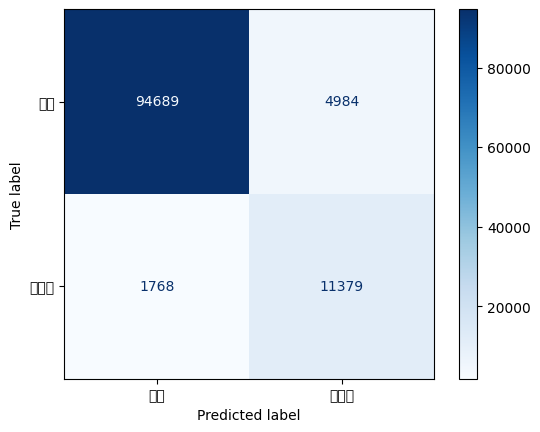

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Robust Covariance Estimation 모델 학습
model = EllipticEnvelope(contamination=0.1)  # contamination: 이상치 비율
model.fit(X_normal_train.values)  # 정상 데이터로 모델 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = model.decision_function(X_normal_test.values)
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = model.decision_function(X_abnormal_test.values)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 5)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores < threshold).astype(int),  # 정상 데이터 예측 (Threshold 미만일 경우 이상치로 간주)
    (test_abnormal_scores < threshold).astype(int)  # 비정상 데이터 예측 (Threshold 미만일 경우 이상치로 간주)
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["정상", "비정상"])
disp.plot(cmap="Blues")
plt.show()


22. Minimum Covariance Determinant (MCD)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.covariance import MinCovDet

# Minimum Covariance Determinant (MCD) 모델 학습
# model = MinCovDet(contamination=0.1)  # contamination: 이상치 비율
model = MinCovDet(support_fraction=0.9)  # support_fraction: 정상 데이터 비율 (1-지원되는 비율)

model.fit(X_normal_train.values)  # 정상 데이터로 모델 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = model.mahalanobis(X_normal_test.values)  # Mahalanobis 거리 계산
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = model.mahalanobis(X_abnormal_test.values)  # Mahalanobis 거리 계산

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (test_abnormal_scores > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 0.6958750305101293
Recall (재현율): 0.8674222256027991
F1 Score: 0.7722363297782292

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1743 11404]]


Minimum Covariance Determinant (MCD) 종료

Ensemble Anomaly Detection
IsolationForest, LocalOutlierFactor, OneClassSVM 3개 모델 결합

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# 개별 모델 학습
iso_forest = IsolationForest(random_state=42, contamination=0.1)
lof = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")

# 모델 훈련
iso_forest.fit(X_normal_train.values)  # Isolation Forest
lof.fit(X_normal_train.values)         # Local Outlier Factor
ocsvm.fit(X_normal_train.values)       # One-Class SVM

# 예측 값 계산
iso_forest_pred = iso_forest.predict(X_normal_test.values)
lof_pred = lof.predict(X_normal_test.values)
ocsvm_pred = ocsvm.predict(X_normal_test.values)

# 예측 결과가 -1이면 이상치(1), 1이면 정상(0)으로 변환
iso_forest_pred = np.where(iso_forest_pred == -1, 1, 0)
lof_pred = np.where(lof_pred == -1, 1, 0)
ocsvm_pred = np.where(ocsvm_pred == -1, 1, 0)

# 앙상블 모델의 예측 결과 결합
# 다수결 방식으로 앙상블 예측
ensemble_pred = np.round((iso_forest_pred + lof_pred + ocsvm_pred) / 3)

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(ensemble_pred))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(ensemble_pred))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([ensemble_pred, ensemble_pred])  # 예측된 라벨

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 0.5
Recall (재현율): 0.09010464217992836
F1 Score: 0.15269265099672716

Classification Report:
              precision    recall  f1-score   support

          정상       0.50      0.91      0.65     99673
         비정상       0.50      0.09      0.15     99673

    accuracy                           0.50    199346
   macro avg       0.50      0.50      0.40    199346
weighted avg       0.50      0.50      0.40    199346


Confusion Matrix:
[[90692  8981]
 [90692  8981]]


deep SVDD모델

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback, EarlyStopping

# SaveModelEveryNEpochs 콜백 정의 (주기적으로 모델 저장)
class SaveModelEveryNEpochs(Callback):
    def __init__(self, save_path, frequency):
        super().__init__()
        self.save_path = save_path
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.frequency == 0:  # 20회마다 저장
            save_path_with_epoch = self.save_path.format(epoch=epoch + 1)
            self.model.save(save_path_with_epoch)
            print(f"\nModel saved at {save_path_with_epoch}")

# Deep SVDD 모델 구현 (Autoencoder 구조 없이)
def build_deep_svdd_model(input_dim):
    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(2, activation='linear'),  # Latent space (no reconstruction)
        layers.Dense(4, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')  # 마지막 레이어는 이상치 탐지의 기준으로 사용
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 모델 저장 경로
model_path_template = r'/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/deepsvdd-epoch-{epoch:02d}.keras'

# 사용자 정의 콜백 추가
save_model_callback = SaveModelEveryNEpochs(save_path=model_path_template, frequency=20)

# 모델 학습 (정상 데이터로만 학습)
input_dim = X_normal_train.shape[1]  # 입력 데이터 차원
deep_svdd_model = build_deep_svdd_model(input_dim)

# 학습 시작
history = deep_svdd_model.fit(
    X_normal_train, X_normal_train,  # Deep SVDD는 정상 데이터로만 학습
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10, mode="min"),
        save_model_callback  # 주기적으로 모델을 저장하는 콜백
    ]
)

# 최종 모델 저장
deep_svdd_model.save('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/deepsvdd-final-model.keras')

# 모델 학습 기록 출력 (optional)
print(history.history)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 2/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12

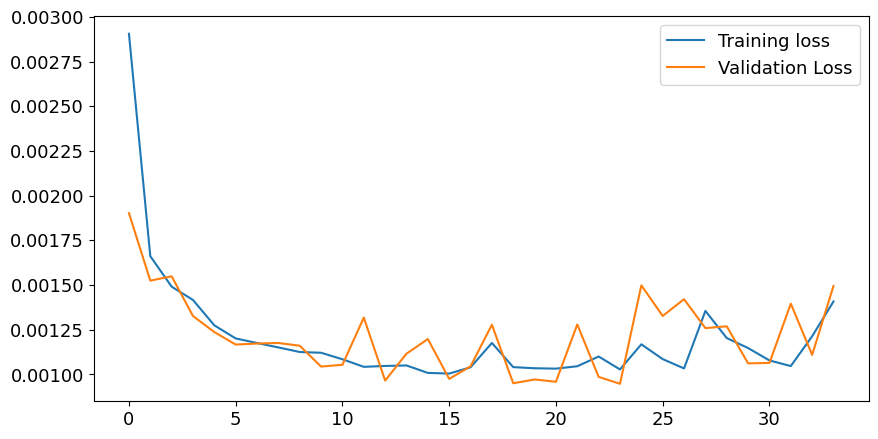

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =13
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()


AttributeError: 'MinCovDet' object has no attribute 'summary'

In [ ]:
x_train_pred = model.predict(X_normal_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train), axis=1)




AttributeError: 'MinCovDet' object has no attribute 'predict'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt

# 모델 학습 (정상 데이터로만 학습)
# min_cov_det = MinCovDet()
# min_cov_det.fit(X_normal_train)  # 정상 데이터로 학습

# 정상 테스트 데이터에 대한 Mahalanobis 거리 계산
# mahalanobis_normal = min_cov_det.mahalanobis(X_normal_test)
# # 비정상 테스트 데이터에 대한 Mahalanobis 거리 계산
# mahalanobis_abnormal = min_cov_det.mahalanobis(X_abnormal_test)

# 정상 테스트 데이터에 대한 Mahalanobis 거리 계산
mahalanobis_normal = model.mahalanobis(X_normal_test)
# 비정상 테스트 데이터에 대한 Mahalanobis 거리 계산
mahalanobis_abnormal = model.mahalanobis(X_abnormal_test)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(mahalanobis_normal, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(mahalanobis_normal))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(mahalanobis_abnormal))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (mahalanobis_normal > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (mahalanobis_abnormal > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinCovDet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinCovDet was fitted without feature names
  warnings.warn(


Precision (정밀도): 0.6958750305101293
Recall (재현율): 0.8674222256027991
F1 Score: 0.7722363297782292

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1743 11404]]


Deep SVDD와 MinCovDet는 사실 연관성이 있습니다. MinCovDet는 Deep SVDD 모델의 학습 과정에서 정상 데이터 분포의 특성을 파악하고 이상치를 탐지하는 데 유용한 기법으로 사용될 수 있습니다. 구체적으로, Deep SVDD의 목적은 정상 데이터의 분포를 모델링하고 이상치를 탐지하는 것인데, MinCovDet가 강건한 공분산 추정을 통해 정상 데이터의 분포를 잘 모델링할 수 있기 때문에, 이를 Deep SVDD 모델의 일부로 사용할 수 있습니다.

Deep SVDD와 MinCovDet의 관계
Deep SVDD는 딥러닝 모델을 사용하여 정상 데이터의 분포를 학습하고, 이 데이터를 **잠재 공간 (latent space)**으로 압축하여 그 공간 내에서 정상 데이터의 특징을 파악하고 이상치를 탐지합니다. 이때 MinCovDet는 정상 데이터의 공분산 구조를 학습하여 정상 데이터의 분포를 더욱 정확하게 이해할 수 있도록 도와주는 도구로 사용될 수 있습니다.

Deep SVDD에서 MinCovDet 사용 이유:
공분산 추정:

Deep SVDD에서 정상 데이터의 분포를 잘 모델링하려면, 정상 데이터의 공분산을 잘 추정해야 합니다. MinCovDet는 강건한 공분산 추정 방법으로, 데이터의 이상치에 민감하지 않게 공분산을 추정할 수 있습니다. 이 공분산 추정이 Deep SVDD 모델이 학습하는 잠재 공간의 구체화에 중요한 역할을 합니다.
정상 데이터 분포 이해:

Deep SVDD의 목표는 정상 데이터의 분포를 학습하여 이를 기준으로 이상치를 탐지하는 것입니다. MinCovDet는 정상 데이터의 분포를 잘 모델링할 수 있어 Deep SVDD 모델의 학습에 유용합니다.
이상치 탐지:

MinCovDet의 Mahalanobis 거리를 사용하면 정상 데이터의 분포에서 벗어난 이상치를 효과적으로 탐지할 수 있습니다. Deep SVDD의 잠재 공간에서 데이터 포인트가 정상 데이터 분포와 얼마나 벗어난 것인지를 판단하는 데 MinCovDet의 공분산 추정이 사용될 수 있습니다.
결론:
Deep SVDD는 딥러닝 기반 모델로, 정상 데이터의 분포를 모델링하고 이상치를 탐지하는 데 중점을 두고 있습니다. MinCovDet는 강건한 공분산 추정 기법으로, 정상 데이터 분포를 모델링하는 데 도움을 줄 수 있으며, 이를 통해 Deep SVDD 모델이 정상 데이터를 더욱 정확하게 학습할 수 있습니다.
따라서, Deep SVDD 모델을 학습할 때 MinCovDet를 사용하는 이유는 정상 데이터의 공분산 구조를 정확하게 파악하고, 이상치를 보다 잘 탐지하기 위해입니다.